# Instructor-led Lab: Data Reduction     &#x1f4c9;

In [1]:

#Import the modules

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca

# for factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls

# for decision tree 
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree

# modules for plotting trees
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

In [2]:

#Check the current working directory (Linux/Unix > Windows BTW)

os.getcwd()

'/home/schoo/Documents/python/week_10'

Seems to be the right working directory. I will just have to add data/ to point it to the correct directory within the current working directory when reading in files. 

In [4]:

#Read in the data

hospital = pd.read_table('data/calihospital.txt')

#Print to confirm

hospital.head(10)

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.21860,2.052343e+07,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.69130,3.344754e+07,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.25410,3.725418e+07,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.37980,2.338557e+07,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.83060,1.368450e+07,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011
5,17741,St. Elizabeth Community Hospital,96080,redbluff.mercy.org/index.htm,Non Profit,Small/Rural,Charity,397.5,232503.01910,3.668289e+07,...,66,363672,Marlin,Bill,M,4,Safety Inspection Member,23987,2,1/1/2011
6,20277,Ukiah Valley Medical Center,95482,www.uvmc.org,Non Profit,Small/Rural,Charity,503.5,214516.44810,3.270922e+07,...,65,398103,Johanson,Sandy,F,1,Regional Representative,46978,4,1/1/2012
7,45736,Mountains Community Hospital,92352,www.mchcares.com,District,Small/Rural,Charity,158.0,30786.19672,5.733927e+06,...,35,721586,Web,David,M,2,State Board Representative,89473,3,1/1/2011
8,29823,Colusa Regional Medical Center,95932-2954,www.colusamedicalcenter.org,Non Profit,Small/Rural,Charity,168.0,51726.49180,9.022366e+06,...,48,768057,Tanner,Patricia,F,3,Acting Director,248904,8,1/1/2009
9,13738,St. Mary Medical Center,92307-2206,www.stmary4health.com,Non Profit,Small/Rural,Charity,1216.0,540975.11750,1.251283e+08,...,186,229849,Milgrom,Patricia,F,4,Safety Inspection Member,23987,2,1/1/2011


Looks good! Now let's move on and do some fun things with this table. <br>
<br>
## Principle Component Analysis (PCA) in Python <br>
<br>
We will conducting the following tasks in this section: <br>
-Using the numerical columns for the hospital, conduct a PCA and obtain the eigenvalues. <br>
-Explaining and select how many variables should be kept based on the eigen values. <br>
-Create and display a scree plot for the same set of data. <br>
-Select how may variables should be kept based on the scree plot.

In [9]:

# First let's create a variable for the numerical columns to make things easier

numerical_hospital = (hospital
                      .filter([
                          'OperRev','OperInc','AvlBeds','NoFTE','NetPatRev','InOperExp','OutOperExp'
                              ]))

# Print to confirm

numerical_hospital.head(10)

,OperRev,OperInc,AvlBeds,NoFTE,NetPatRev,InOperExp,OutOperExp
0,49933713,-5505933,15,327.0,135520.21860,2.052343e+07,34916220.47
1,53351748,-444391,99,345.0,136156.69130,3.344754e+07,20348596.22
2,72933707,-2152920,107,601.2,197094.25410,3.725418e+07,37832448.33
3,51087341,3040415,55,400.0,139170.37980,2.338557e+07,24661355.90
4,42845642,14001153,42,262.0,116797.83060,1.368450e+07,15159986.51
5,85808509,12386360,66,397.5,232503.01910,3.668289e+07,36739260.30
6,79005075,2724001,65,503.5,214516.44810,3.270922e+07,43571851.35
7,11947133,-4514239,35,158.0,30786.19672,5.733927e+06,10727445.10
8,19445901,21025,48,168.0,51726.49180,9.022366e+06,10402509.55
9,199873795,7943967,186,1216.0,540975.11750,1.251283e+08,66801544.65


The values for the different numerical variables are all of the place. From numbers in the teens to values over a thousand. We need to address this before we can go ahead with the PCA.

In [20]:

# Scaling Function
scale_function = preprocessing.StandardScaler()

# Fit and transform data and conduct the PCA
pca_hospital = pca(n_components=7).fit(scale_function.fit_transform(numerical_hospital))

# Get the eigenvalues
pca_hospital.explained_variance_

array([5.72134563e+00, 1.07657967e+00, 1.91383827e-01, 9.31699632e-02,
       3.29143500e-02, 1.27322677e-03, 5.91421004e-22])

So what variables should we keep? Well based on the eigenvalues seen above, we should only keep variables with an eigenvalue greater than one. Only two of the variable fit this criteria, so we will only keep two of the seven variables based on the eigenvalues.

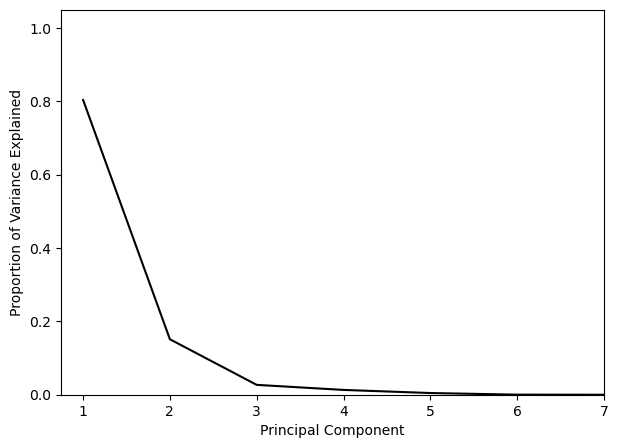

In [14]:

#Create and show the scree plot

plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7], pca_hospital.explained_variance_ratio_, '-0')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7])

plt.show()

Based upon the scree plot above, we can see that there are 2 deffinitive variables that should be kept. There is some slight implication that there may be three variables, but it can be said with greater certainty that there are two that should be kept. <br>
<br>

## Clustering in Python

In [15]:

#First let's go through and look at the categorical variables within the dataframe

hospital.select_dtypes(include=['object']).head(10)


,Name,Zip,Website,TypeControl,Teaching,DonorType,LastName,FirstName,Gender,PositionTitle,StartDate
0,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,Web,David,M,Safety Inspection Member,1/1/2012
1,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,Rodriguez,Jose,M,Regional Representative,1/1/2009
2,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,Adamson,David,M,Regional Representative,1/1/2012
3,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,Roberts,Melissa,F,Safety Inspection Member,1/1/2009
4,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,Iwata,Akira,M,Regional Representative,1/1/2011
5,St. Elizabeth Community Hospital,96080,redbluff.mercy.org/index.htm,Non Profit,Small/Rural,Charity,Marlin,Bill,M,Safety Inspection Member,1/1/2011
6,Ukiah Valley Medical Center,95482,www.uvmc.org,Non Profit,Small/Rural,Charity,Johanson,Sandy,F,Regional Representative,1/1/2012
7,Mountains Community Hospital,92352,www.mchcares.com,District,Small/Rural,Charity,Web,David,M,State Board Representative,1/1/2011
8,Colusa Regional Medical Center,95932-2954,www.colusamedicalcenter.org,Non Profit,Small/Rural,Charity,Tanner,Patricia,F,Acting Director,1/1/2009
9,St. Mary Medical Center,92307-2206,www.stmary4health.com,Non Profit,Small/Rural,Charity,Milgrom,Patricia,F,Safety Inspection Member,1/1/2011


Great, now we can see all of the categorical variables above, but which ones matter most. Many of these categorical variables don't explicitly measure any aspect of the hospital. There are three categorical variables which do so: <br>
-TypeControl <br>
-Teaching <br>
-DonorType<br>
<br>
Now that we have those three variables in mind, let's now go ahead and create a new dataframe with the numerical and categorical variables for clusterin!

In [17]:
clustering_hospital = (hospital
                      .filter([
    'NoFTE','NetPatRev','InOperExp','OutOperExp','OperRev','OperInce','AvlBeds',
    'Teaching','TypeControl','DonorType'
    ]))

For the categorical variables, we are not able to use the k means for the categorical variable. To address this, we will assign a numerical value to each of th different categorical values within a variable (i.e. apple =1, orange =2). We will then print out the impact that each of the categorical variables have on the numerical values.

In [25]:

#Establish the numberical labeling for the categorical variables

label_encoding = preprocessing.LabelEncoder()

#Build the first cluster model for Teaching

kmean = cls.KMeans(n_clusters=2).fit(numerical_hospital)
kmean.labels_

clustering_hospital['Teaching'] = label_encoding.fit_transform(clustering_hospital['Teaching'])

first_cluster_model = metcs.confusion_matrix(clustering_hospital.Teaching, kmean.labels_)

#Build the second cluster model for TypeControl

kmean2 = cls.KMeans(n_clusters=4).fit(numerical_hospital)
kmean2.labels_

clustering_hospital['TypeControl'] = label_encoding.fit_transform(clustering_hospital['TypeControl'])

second_cluster_model = metcs.confusion_matrix(clustering_hospital.TypeControl, kmean2.labels_)

#Build the third cluster model for DonorType

kmean3 = cls.KMeans(n_clusters=2).fit(numerical_hospital)
kmean3.labels_

clustering_hospital['DonorType'] = label_encoding.fit_transform(clustering_hospital['DonorType'])

thrid_cluster_model = metcs.confusion_matrix(clustering_hospital.DonorType, kmean3.labels_)

#Print out the results

print("Teaching\n", first_cluster_model)
print("TypeControl\n", second_cluster_model)
print("DonorType\n", thrid_cluster_model)

Teaching
 [[44  0]
 [ 9  8]]
TypeControl
 [[ 0  2  4  1]
 [ 0 14  0  0]
 [ 0  3  0  0]
 [ 3 27  4  3]]
DonorType
 [[ 8  9]
 [44  0]]


Out of the three different categorical variables we investigated, the variable "Teaching" appears to perform the best. This model also seems to fit the two variables that we determined previously should be kept, as there are two different values for this variable. The third clustering model performs similarly to the first, however, thinking about what these different variables represent, it would make more sense to focus on the Teaching variable as oppossed to the DonorType. The type of donor may affect the Teaching, but it cannot be considered as direct as Teaching. Now let's create a visualiztion for the confusion matrix:

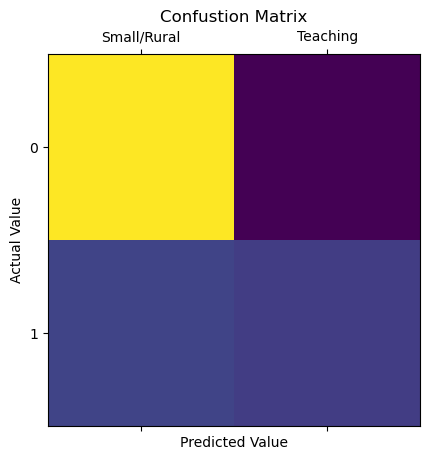

In [26]:
plt.matshow(first_cluster_model)
plt.title("Confustion Matrix")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
plt.xticks([0,1], ['Small/Rural','Teaching'])

plt.show()

This visualiztion of the confusion matrix does an okay job. Colors look fairly different, specifically the top left corner of the visualization. This quadrant represents the 44 values we saw earlier, the other values are 0,8,9; thus the difference in colors makes sense. 

Thank you so much for going through my final instructor-led lab. I hope you enjoyed     &#x1f601;